In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import keras

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [23]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Label : 9')

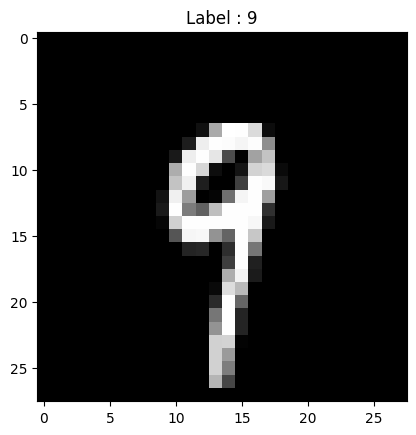

In [24]:
plt.imshow(x_train[600], cmap='gray')
plt.title(f'Label : {y_train[600]}')

In [25]:
# normalize the pixel value in the range 0-1
x_train = x_train/255.0
x_test = x_test/255.0

In [26]:
# flatten the image from 28X28 matrix to vector
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [27]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128,  activation = 'relu'),
    keras.layers.Dense(64,  activation = 'relu'),
    keras.layers.Dense(10,  activation = 'softmax')
])

In [30]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs= 10, batch_size = 32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9730 - val_loss: 0.1244
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.9719 - val_loss: 0.1477
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9945 - loss: 0.0158 - val_accuracy: 0.9759 - val_loss: 0.1274
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9970 - loss: 0.0088 - val_accuracy: 0.9764 - val_loss: 0.1202
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9965 - loss: 0.0102 - val_accuracy: 0.9740 - val_loss: 0.1398
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9962 - loss: 0.0107 - val_accuracy: 0.9744 - val_loss: 0.1461
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9736 - val_loss: 0.1473
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0117 -

In [33]:
dict_data = history.history

In [35]:
dict_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
accuracy = dict_data['accuracy']
val_accuracy = dict_data['val_accuracy']
loss = dict_data['loss']
val_loss = dict_data['val_loss']

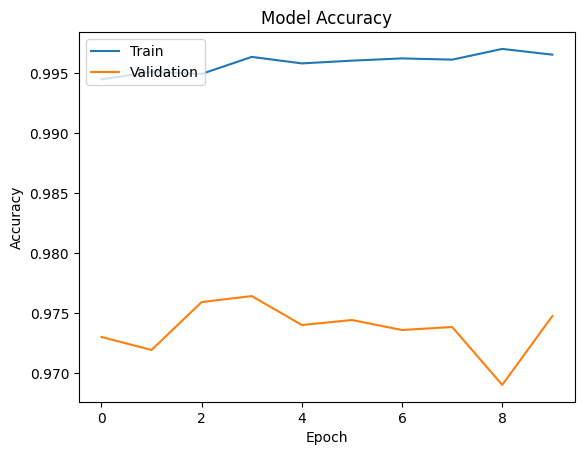

In [37]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

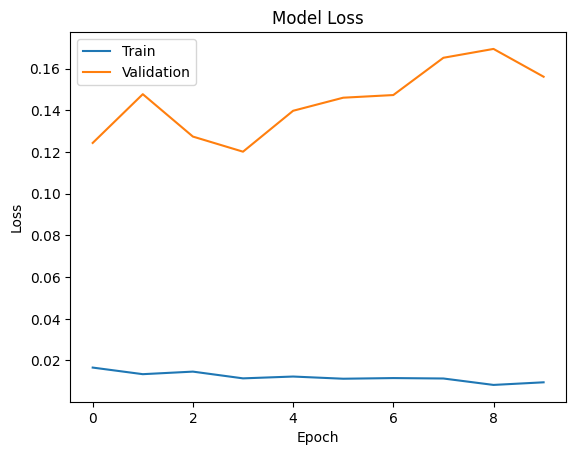

In [38]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9721 - loss: 0.1601
Test accuracy: 0.9761999845504761
Test loss: 0.141242116689682
